In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

In [ ]:
df = pd.read_csv('../data/wine_quality_modelos2.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

In [80]:
# desordenamos la columna del tipo de vino para que no vaya en orden
df['wine_type'] = np.random.permutation(df['wine_type'].values)
df.to_csv('../data/wine_quality_modelos2.csv')
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
1,white,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,baja
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,baja
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,media
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,media
6493,red,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,baja
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,media
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,media


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_type             6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  quality_category      6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [82]:
st_scaler = StandardScaler()

# Separamos las features de las etiquetas 
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar', 
        'chlorides', 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol']]
y = df["quality_category"]

# Escalamos los datos
X_scaled = st_scaler.fit_transform(X)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 10)
(5197,)
(1300, 10)
(1300,)


# MODELO LOGISTIC REGRESSION

In [84]:
modelo_lr = LogisticRegression(
    max_iter=1000,  # Aumentar iteraciones para convergencia
    random_state=10,
    class_weight='balanced',
    multi_class='auto'  # Auto-detecta si es binario o multiclase
)
modelo_lr.fit(X_train, y_train)

c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto',
                   random_state=10)

In [85]:
y_pred = modelo_lr.predict(X_test)
y_proba = modelo_lr.predict_proba(X_test)  # Probabilidades para todas las clases

In [86]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
accu_lr=accuracy_score(y_test, y_pred)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
cm_lr = confusion_matrix(y_test, y_pred)

# 3. Reporte completo (precision, recall, f1 por clase)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 4. ROC-AUC (para multiclase)
if len(modelo_lr.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_lr=roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba[:, 1]))
roc_auc_lr

Accuracy: 0.5061538461538462
Precision (macro): 0.46786542959932165
Recall (macro): 0.5782484840716943
F1-Score (macro): 0.4338858195687436

Matriz de Confusión:
[[ 30   6  10]
 [ 28 334 111]
 [275 212 294]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.09      0.65      0.16        46
        baja       0.61      0.71      0.65       473
       media       0.71      0.38      0.49       781

    accuracy                           0.51      1300
   macro avg       0.47      0.58      0.43      1300
weighted avg       0.65      0.51      0.54      1300



np.float64(0.741211028182244)

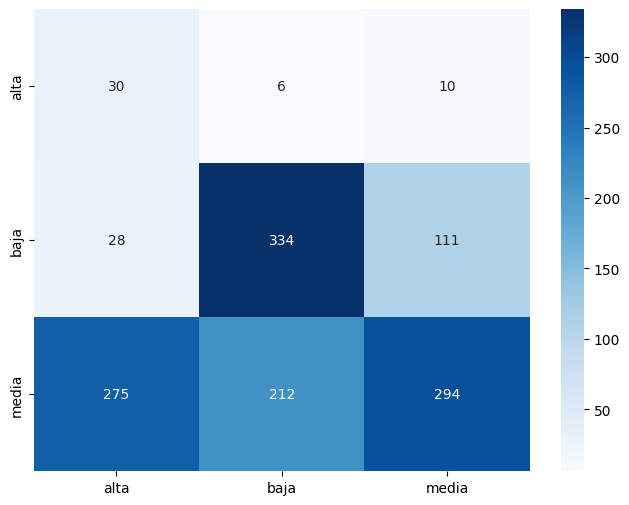

In [87]:
# Matriz de confusion
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm_lr, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media']   # Nombres de clases
)

In [36]:
conteo = y_test['quality_category'].value_counts()
conteo

quality_category
media    781
baja     473
alta      46
Name: count, dtype: int64

# MODELO RANDOM FOREST

In [42]:
modelo_rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    class_weight='balanced',
    oob_score=True,
    random_state=10)

modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000, oob_score=True,
                       random_state=10)

In [43]:
y_pred_rf = modelo_rf.predict(X_test)
y_proba_rf = modelo_rf.predict_proba(X_test) 

In [44]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (macro):", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_rf, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_rf, average='macro'))
accu_rf=accuracy_score(y_test, y_pred_rf)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf)) 
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 3. Reporte completo por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# 4. ROC-AUC (para multiclase)
if len(modelo_rf.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_rf=roc_auc_score(y_test_bin, y_proba_rf, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba_rf[:, 1]))
roc_auc_rf

Accuracy: 0.7146153846153847
Precision (macro): 0.6004728261695306
Recall (macro): 0.6691351343653427
F1-Score (macro): 0.6250859196138527

Matriz de Confusión:
[[ 26   0  20]
 [  0 343 130]
 [ 49 172 560]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.35      0.57      0.43        46
        baja       0.67      0.73      0.69       473
       media       0.79      0.72      0.75       781

    accuracy                           0.71      1300
   macro avg       0.60      0.67      0.63      1300
weighted avg       0.73      0.71      0.72      1300



np.float64(0.8444705897297607)

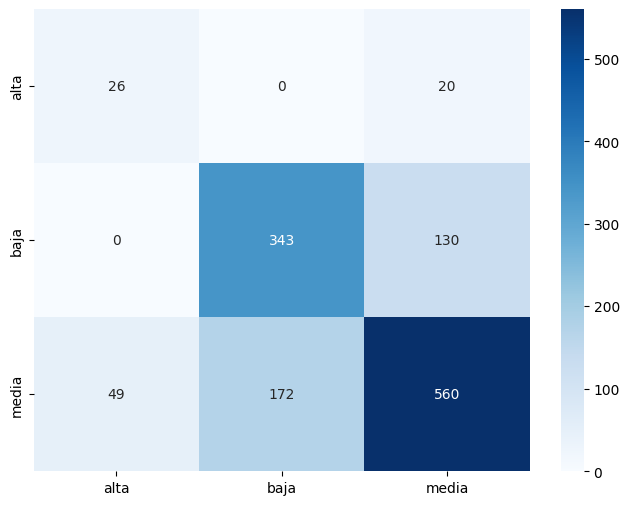

In [45]:
# Matriz de confusion
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm_rf, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media'] # Nombres de clases
)

# RANDOM FOREST CON GRIDSEARCH

In [46]:
rf = RandomForestClassifier()
parametros={
    "n_estimators":[50,100,150],
    "max_depth":[3,5,7,10,12],
    "max_features":[2,3,4],
    "bootstrap":[True, False]
}

gs_rfc = GridSearchCV(rf, parametros, scoring="accuracy", cv = 5, verbose=3, n_jobs=1)
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END bootstrap=True, max_depth=3, max_features=2, n_estimators=50;, score=0.716 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=2, n_estimators=50;, score=0.713 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=2, n_estimators=50;, score=0.720 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=2, n_estimators=50;, score=0.681 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=2, n_estimators=50;, score=0.737 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=2, n_estimators=100;, score=0.719 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=2, n_estimators=100;, score=0.701 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=2, n_estimators=100;, score=0.725 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=2, n_estimators=100;, sc

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 7, 10, 12],
                         'max_features': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=3)

In [47]:
print(gs_rfc.best_estimator_)
print(gs_rfc.best_score_)

RandomForestClassifier(bootstrap=False, max_depth=12, max_features=4)
0.7823739542459466


In [48]:
modelo_rf_gs = RandomForestClassifier(
    n_estimators=1000,
    max_depth=12,
    max_features=4,
    class_weight='balanced',
    random_state=10)

modelo_rf_gs.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=4,
                       n_estimators=1000, random_state=10)

In [49]:
y_pred_rf_gs = modelo_rf_gs.predict(X_test)
y_proba_rf_gs = modelo_rf_gs.predict_proba(X_test) 

In [50]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_rf_gs))
print("Precision (macro):", precision_score(y_test, y_pred_rf_gs, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_rf_gs, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_rf_gs, average='macro'))
accu_rf_gs=accuracy_score(y_test, y_pred_rf_gs)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf_gs)) 
cm_rf_gs = confusion_matrix(y_test, y_pred_rf_gs)

# 3. Reporte completo por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf_gs))

# 4. ROC-AUC (para multiclase)
if len(modelo_rf_gs.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_rf_gs=roc_auc_score(y_test_bin, y_proba_rf_gs, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba_rf_gs[:, 1]))
roc_auc_rf_gs

Accuracy: 0.7876923076923077
Precision (macro): 0.7605534522877696
Recall (macro): 0.6562365275391664
F1-Score (macro): 0.6920463109712562

Matriz de Confusión:
[[ 18   0  28]
 [  0 347 126]
 [  7 115 659]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.72      0.39      0.51        46
        baja       0.75      0.73      0.74       473
       media       0.81      0.84      0.83       781

    accuracy                           0.79      1300
   macro avg       0.76      0.66      0.69      1300
weighted avg       0.79      0.79      0.78      1300



np.float64(0.8835999533803198)

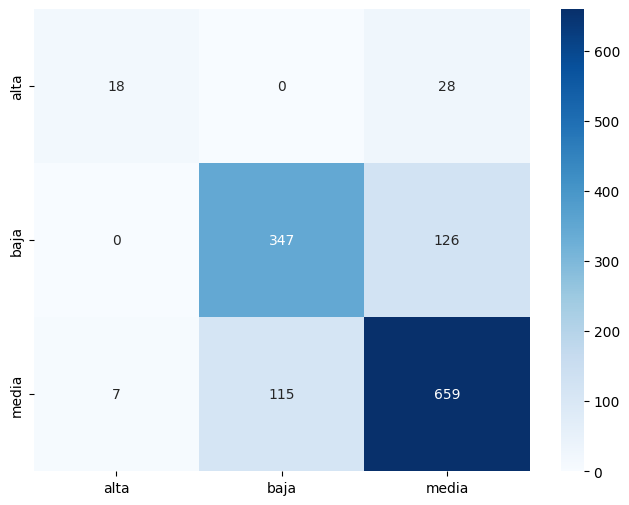

In [51]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap( 
    cm_rf_gs, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media'] # Nombres de clases
)

# MODELO ADABOOST

In [52]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=12)
modelo_abc = AdaBoostClassifier(
    estimator=dt, 
    n_estimators=1000, 
    learning_rate=0.5,
    random_state=10)
 
modelo_abc.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=12),
                   learning_rate=0.5, n_estimators=1000, random_state=10)

In [53]:
y_pred_abc = modelo_abc.predict(X_test)
y_proba_abc = modelo_abc.predict_proba(X_test) 

In [54]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_abc))
print("Precision (macro):", precision_score(y_test, y_pred_abc, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_abc, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_abc, average='macro'))
accu_abc=accuracy_score(y_test, y_pred_abc)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_abc)) 
cm_rf_abc = confusion_matrix(y_test, y_pred_abc)


# 4. Reporte completo por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_abc))

# 4. ROC-AUC (para multiclase)
if len(modelo_abc.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_abc=roc_auc_score(y_test_bin, y_proba_abc, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba_abc[:, 1]))
roc_auc_abc

Accuracy: 0.82
Precision (macro): 0.8616132927439514
Recall (macro): 0.665675179859375
F1-Score (macro): 0.7197278370613583

Matriz de Confusión:
[[ 17   0  29]
 [  0 341 132]
 [  1  72 708]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.94      0.37      0.53        46
        baja       0.83      0.72      0.77       473
       media       0.81      0.91      0.86       781

    accuracy                           0.82      1300
   macro avg       0.86      0.67      0.72      1300
weighted avg       0.82      0.82      0.81      1300



np.float64(0.908679674573801)

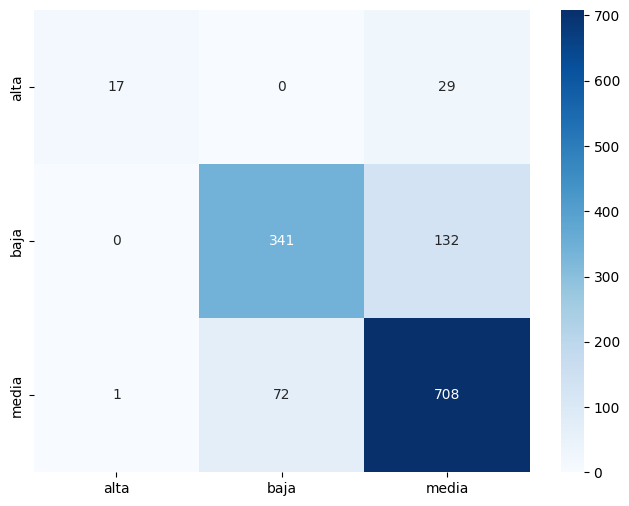

In [55]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm_rf_abc, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media'] # Nombres de clases
)

# MODELO XGBOOST

In [56]:
from sklearn.preprocessing import LabelEncoder

# Crear y ajustar el encoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Convierte ['alta', 'baja', 'media'] → [0, 1, 2]

# Aplicar el mismo encoder a y_test (si lo tienes)
y_test_encoded = le.transform(y_test)

c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [62]:
conteo = pd.Series(y_test_encoded).value_counts().sort_index()
conteo

0     46
1    473
2    781
Name: count, dtype: int64

In [64]:
from xgboost import XGBClassifier

modelo_xgb = XGBClassifier(
    n_estimators = 1000, 
    random_state = 10, 
    learning_rate = 0.5,
    objective='multi:softmax',  # Necesario para multiclase
    num_class=3)

modelo_xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_class=3, ...)

In [65]:
y_pred_encoded = modelo_xgb.predict(X_test)
y_pred_xgb= le.inverse_transform(y_pred_encoded) 
y_proba_xgb = modelo_xgb.predict_proba(X_test) 

In [66]:
# 1. Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision (macro):", precision_score(y_test, y_pred_xgb, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_xgb, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_xgb, average='macro'))
accu_xgb=accuracy_score(y_test, y_pred_xgb)

# 2. Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb)) 
cm_rf_xgb = confusion_matrix(y_test, y_pred_xgb)

# 4. Reporte completo por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

# 4. ROC-AUC (para multiclase)
if len(modelo_xgb.classes_) > 2:
    y_test_bin = pd.get_dummies(y_test).values  # One-hot encoding
    roc_auc_xgb = roc_auc_score(y_test_bin, y_proba_xgb, multi_class='ovr')
else:
    print("ROC-AUC (Binario):", roc_auc_score(y_test, y_proba_xgb[:, 1]))
roc_auc_xgb

Accuracy: 0.8007692307692308
Precision (macro): 0.7750450724741506
Recall (macro): 0.6481855251988692
F1-Score (macro): 0.688330234891024

Matriz de Confusión:
[[ 16   0  30]
 [  0 341 132]
 [  6  91 684]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        alta       0.73      0.35      0.47        46
        baja       0.79      0.72      0.75       473
       media       0.81      0.88      0.84       781

    accuracy                           0.80      1300
   macro avg       0.78      0.65      0.69      1300
weighted avg       0.80      0.80      0.80      1300



np.float64(0.8812694193953147)

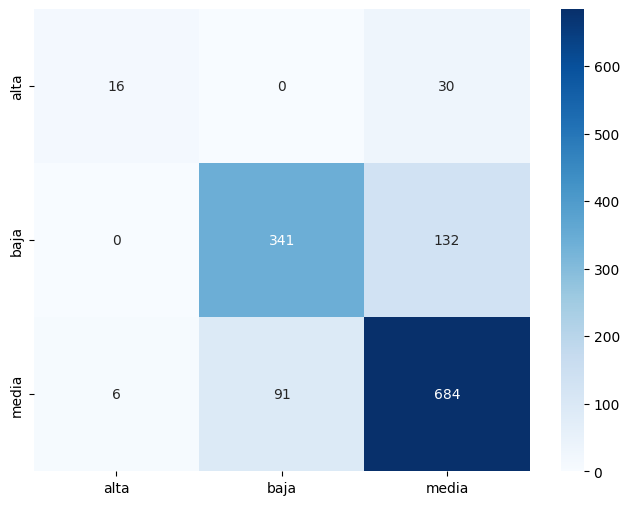

In [68]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm_rf_xgb, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['alta', 'baja', 'media'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['alta', 'baja', 'media'] # Nombres de clases
)

# COMPARAMOS

In [69]:
roc_auc_values = [roc_auc_lr, roc_auc_rf, roc_auc_rf_gs, roc_auc_abc, roc_auc_xgb]  
accuracy_values = [accu_lr, accu_rf, accu_rf_gs, accu_abc, accu_xgb]  

df_resultados = pd.DataFrame({'ROC AUC': roc_auc_values,'ACCURACY': accuracy_values}, 
                             index=[
                                 'LogisticRegression',
                                 'RandomForestClassifier',
                                 'RandomForestClassifier_GS',
                                 'AdaBoostClassifier',
                                 'XGBClassifier']
                             )

df_resultados = df_resultados.sort_values('ROC AUC', ascending=False)
print(df_resultados)

                            ROC AUC  ACCURACY
AdaBoostClassifier         0.908680  0.820000
RandomForestClassifier_GS  0.883600  0.787692
XGBClassifier              0.881269  0.800769
RandomForestClassifier     0.844471  0.714615
LogisticRegression         0.741211  0.506154


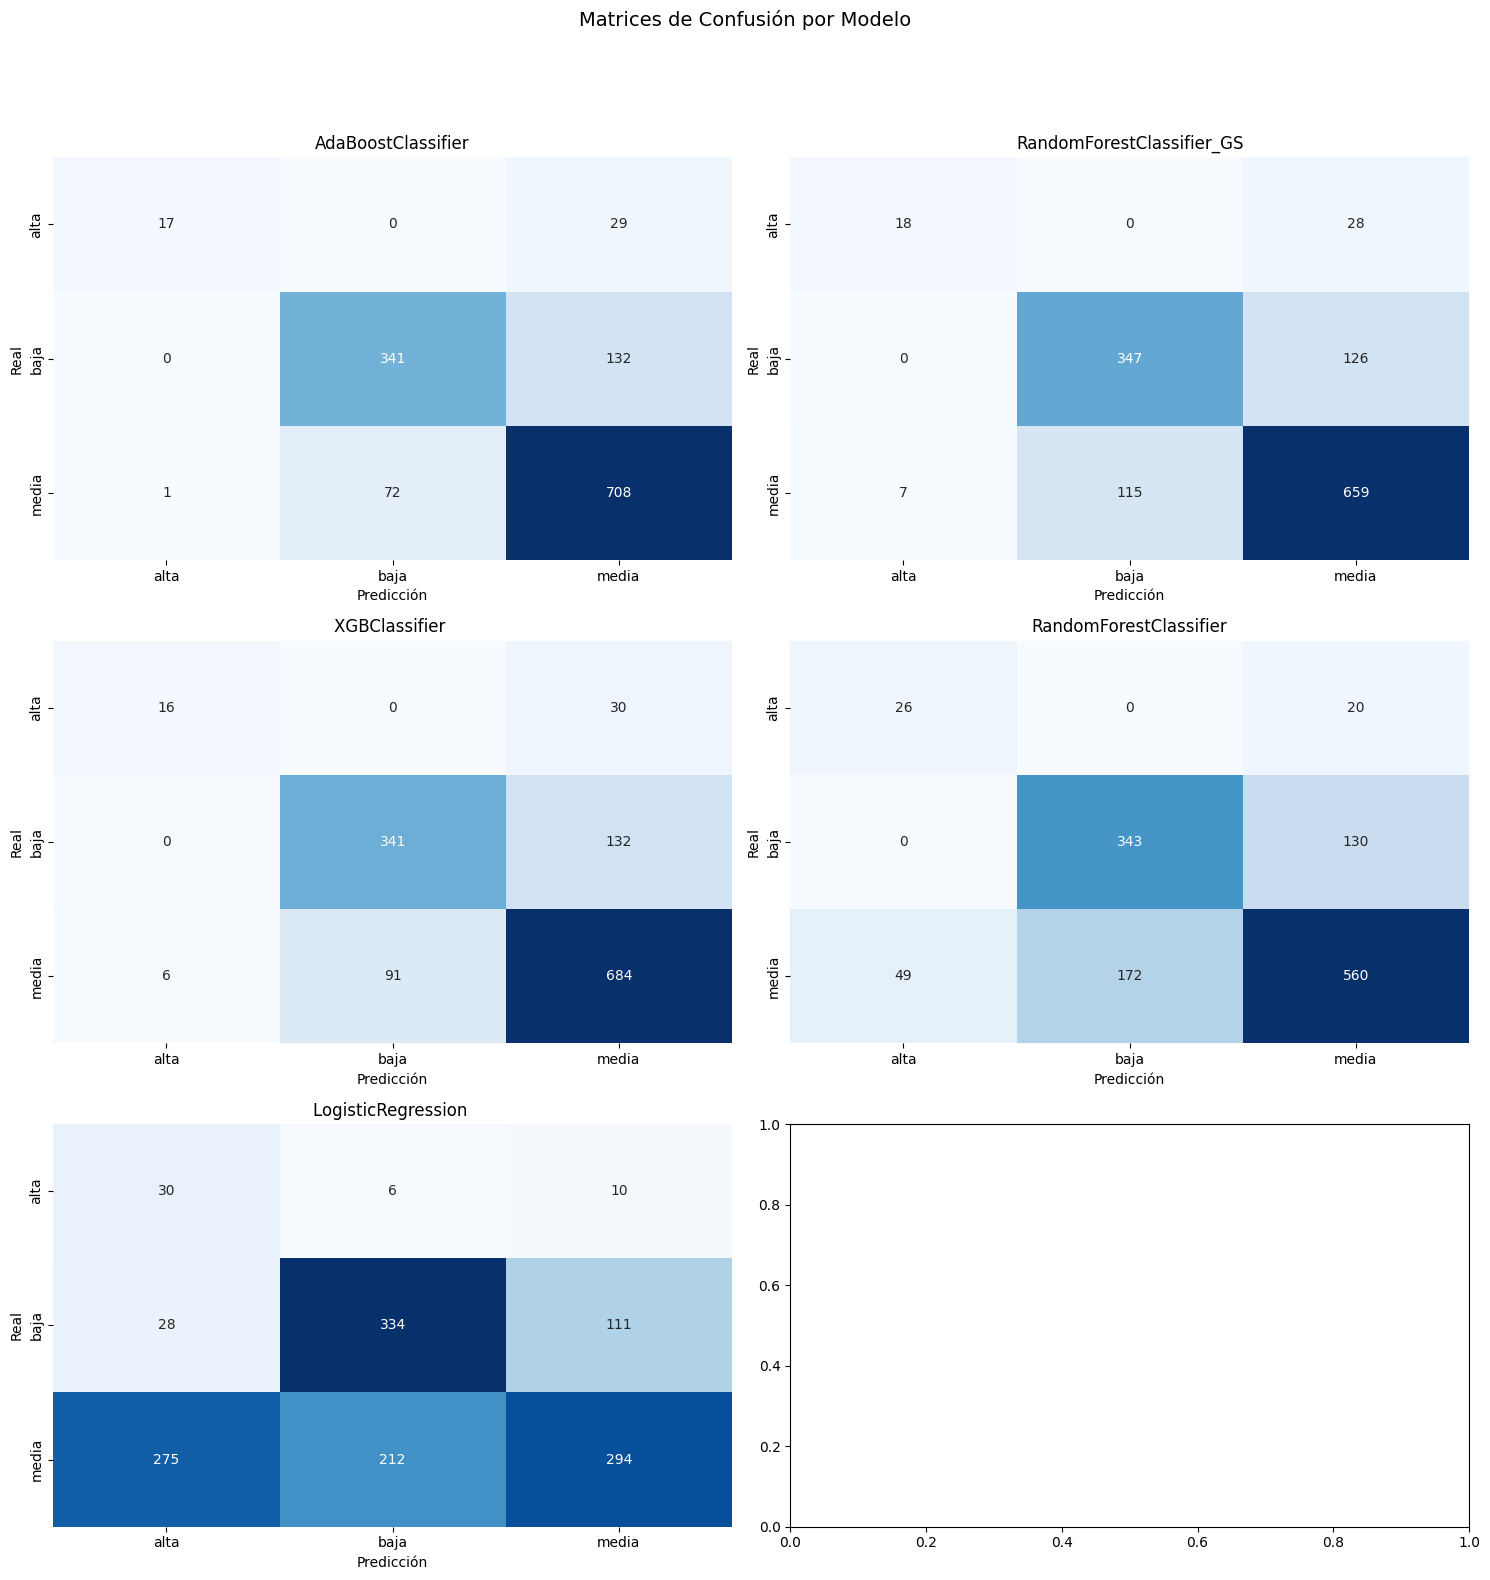

In [72]:
cm_lr = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_gs = confusion_matrix(y_test, y_pred_rf_gs)
cm_rf_abc = confusion_matrix(y_test, y_pred_abc)
cm_rf_xgb = confusion_matrix(y_test, y_pred_xgb)


# Configuración común
labels = ['alta', 'baja', 'media']  # Etiquetas de clases
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # 3 fila, 2 columnas
plt.suptitle('Matrices de Confusión por Modelo', fontsize=14, y=1.05)

# Función para generar heatmap
def plot_confusion_matrix(cm, ax, title):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=labels,
        yticklabels=labels,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

# Plotear cada matriz
plot_confusion_matrix(cm_rf_abc, axes[0, 0], 'AdaBoostClassifier')
plot_confusion_matrix(cm_rf_gs, axes[0, 1], 'RandomForestClassifier_GS')
plot_confusion_matrix(cm_rf_xgb, axes[1, 0], 'XGBClassifier ')
plot_confusion_matrix(cm_rf, axes[1, 1], 'RandomForestClassifier')
plot_confusion_matrix(cm_lr, axes[2, 0], 'LogisticRegression ')

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()


# FEATURES IMPORTANCES

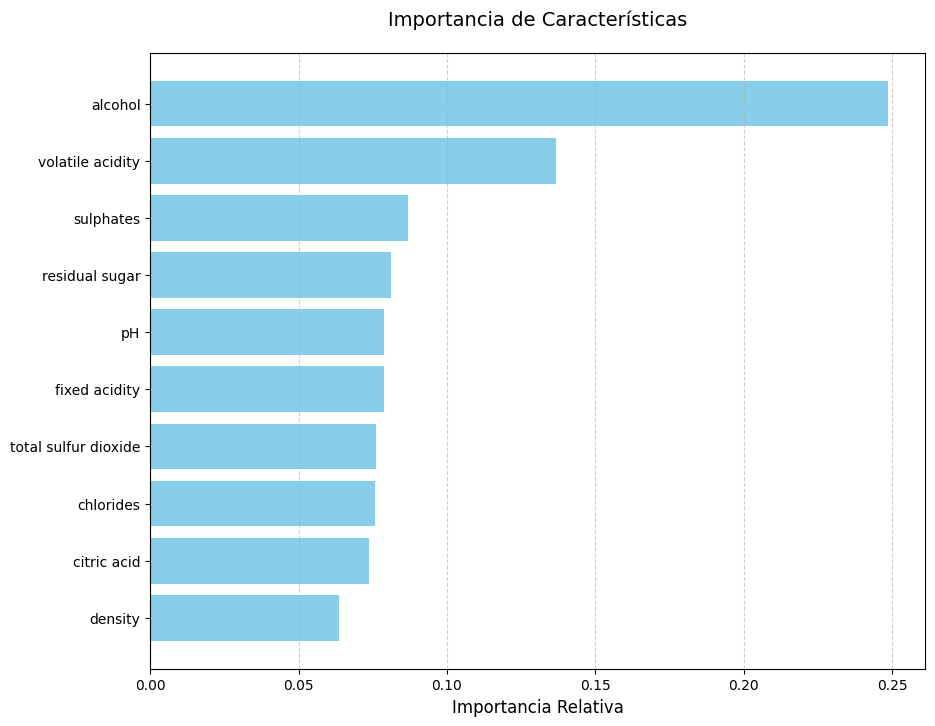

In [79]:
importances = modelo_xgb.feature_importances_
feature_names = ['fixed acidity','volatile acidity','citric acid','residual sugar', 
        'chlorides', 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol'] 

# 2. Ordenar características por importancia (de mayor a menor)
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = [feature_names[i] for i in indices]

# 3. Crear gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), sorted_importances, align='center', color='skyblue')
plt.yticks(range(len(importances)), sorted_features)
plt.gca().invert_yaxis()  # Invertir eje Y para mostrar la más importante arriba
plt.xlabel('Importancia Relativa', fontsize=12)
plt.title('Importancia de Características', fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)


# GUARDAMOS LOS NUEVOS MODELOS

In [ ]:
with open('../models/modelo_abc1.pkl', 'wb') as archivo:  # 'wb' = modo escritura binaria
    pickle.dump(modelo_abc, archivo)

print("Modelo guardado como 'modelo_abc1.pkl'")

In [ ]:
with open('../models/modelo_rf_gs1.pkl', 'wb') as archivo:  # 'wb' = modo escritura binaria
    pickle.dump(modelo_rf_gs, archivo)

print("Modelo guardado como 'modelo_rf_gs1.pkl'")

In [ ]:
with open('../models/modelo_xgb1.pkl', 'wb') as archivo:  # 'wb' = modo escritura binaria
    pickle.dump(modelo_xgb, archivo)

print("Modelo guardado como 'modelo_xgb1.pkl'")

In [ ]:
with open('../models/modelo_rf1.pkl', 'wb') as archivo:  # 'wb' = modo escritura binaria
    pickle.dump(modelo_rf, archivo)

print("Modelo guardado como 'modelo_rf1.pkl'")